In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import folium
import webbrowser
from folium.plugins import HeatMap

In [2]:
# extract data from license.csv to get restaurants' name in Boston

license_data = pd.read_csv('./active_food_license.csv')
license_data.head()
license_data = license_data.rename(columns={'Address': 'street_address'})
license_data = license_data.rename(columns={'BusinessName': 'name'})
license_data = license_data.rename(columns={'ZIP': 'postal_code'})

#print(license_data.head(5))

license_data['postal_code'] = license_data['postal_code'].str[1:5]
# license_data['postal_code'] = license_data['postal_code'].astype(int)
license_data['postal_code'] = license_data['postal_code'].astype(str)
license_data.head(5)

,name,DBAName,street_address,CITY,State,postal_code,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,,NaN,73 Chelsea,Charlestown,MA,2129,Active,FS,Eating & Drinking,2012-03-06 12:23:38,10000000000,30258.0,42.372849,-71.058889
1,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,2132,Active,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.157410
2,100 Percent Delicia Food,NaN,635 Hyde Park,Roslindale,MA,2131,Active,FS,Eating & Drinking,2013-02-15 10:46:21,16174774546,77476.0,42.278590,-71.119440
3,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,2130,Active,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.113860
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,2125,Active,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.000000


In [3]:
# extract data safegraph to get the places information in boston

sg01 = pd.read_csv('sg_09.csv')
sg01 = sg01.rename(columns={'location_name': 'name'})
sg01 = sg01.drop(['safegraph_place_id','safegraph_brand_ids','distance_from_home','related_same_day_brand','related_same_month_brand','device_type'], axis = 1)
# license_data['postal_code'] = license_data['postal_code'].astype(int)
sg01['postal_code'] = sg01['postal_code'].astype(str)
sg01.head(10)

,placekey,name,street_address,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,...,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,median_dwell,bucketed_dwell_times,popularity_by_hour,popularity_by_day
0,zzy-222@62j-sj4-975,Solar Nails,150 Hungtington Ave Ste 4,Boston,MA,2115,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,11,...,"[1,1,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0...",2.502501e+11,{},"{""250250105002"":6,""250235421021"":4,""4802702310...",{},"{""US"":7}",91.0,"{""<5"":0,""5-20"":2,""21-60"":1,""61-240"":5,"">240"":3}","[2,2,2,2,2,2,3,3,2,4,3,3,3,4,5,4,3,0,1,1,2,3,2,2]","{""Monday"":2,""Tuesday"":3,""Wednesday"":2,""Thursda..."
1,247-222@62j-sj5-dgk,Ideal Collision Repair,404 Border St,Boston,MA,2128,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,220,...,"[9,10,8,7,11,6,8,10,6,7,5,3,8,7,10,3,11,5,5,4,...",2.502505e+11,"{""250250501012"":9,""250250502002"":4,""2502505010...","{""250250501012"":12,""250251605011"":4,""330170846...",{},"{""US"":61}",50.5,"{""<5"":7,""5-20"":68,""21-60"":44,""61-240"":51,"">240...","[27,25,25,26,26,32,42,45,49,51,49,58,63,61,46,...","{""Monday"":22,""Tuesday"":52,""Wednesday"":38,""Thur..."
2,2gn-222@62j-shz-35z,Liuyishou Hotpot Boston,702 Washington St,Boston,MA,2111,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,309,...,"[5,7,14,12,12,11,5,11,10,8,11,17,13,7,6,11,11,...",2.502507e+11,"{""250250702003"":13,""250214151012"":7,""250250702...","{""250250702001"":13,""250250702003"":10,""36103123...",{},"{""US"":210}",51.0,"{""<5"":5,""5-20"":86,""21-60"":78,""61-240"":113,"">24...","[6,6,5,5,5,9,12,16,25,34,46,54,74,98,100,78,60...","{""Monday"":34,""Tuesday"":44,""Wednesday"":51,""Thur..."
3,294-222@62j-shz-4n5,Bogie's Place,25 Temple Pl,Boston,MA,2111,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,38,...,"[0,5,3,3,2,2,3,0,2,1,0,0,2,2,1,0,0,2,2,0,0,0,0...",2.502507e+11,"{""361190008011"":4,""250251003003"":4,""2502508120...","{""250092102003"":4,""250173684002"":4}",{},"{""US"":30}",42.0,"{""<5"":1,""5-20"":9,""21-60"":13,""61-240"":8,"">240"":7}","[6,7,6,6,6,6,6,6,6,5,4,7,5,5,6,4,3,3,5,6,9,6,7...","{""Monday"":6,""Tuesday"":1,""Wednesday"":7,""Thursda..."
4,226-224@62j-shz-3qz,Cafe de Boston Eatery & Catering,75 Federal St,Boston,MA,2110,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,50,...,"[1,1,1,4,0,0,0,4,1,1,2,4,0,3,1,1,2,9,1,1,3,2,1...",2.502507e+11,"{""250250701012"":4,""250235211022"":4,""2501731550...","{""250250408013"":4,""250251704004"":4,""2500561610...",{},"{""US"":26}",44.5,"{""<5"":1,""5-20"":17,""21-60"":10,""61-240"":16,"">240...","[3,3,2,2,5,7,4,3,8,13,11,13,9,10,7,8,4,8,7,5,0...","{""Monday"":8,""Tuesday"":9,""Wednesday"":5,""Thursda..."
5,22c-222@62j-sj3-qfz,Boston Sports Clubs,505 Boylston St,Boston,MA,2116,Boston Sports Clubs,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,23,...,"[1,0,1,2,1,2,1,0,0,0,0,0,1,0,0,3,0,0,2,0,1,4,0...",2.502501e+11,"{""330130032002"":4,""250173425001"":4,""1209900773...","{""250250701014"":4,""330110101003"":4,""1209900773...",{},"{""US"":20}",44.0,"{""<5"":0,""5-20"":1,""21-60"":16,""61-240"":6,"">240"":0}","[0,0,0,0,0,0,0,3,2,1,5,8,4,2,2,0,1,5,7,1,1,1,0,0]","{""Monday"":3,""Tuesday"":5,""Wednesday"":3,""Thursda..."
6,zzz-222@62j-sj3-vs5,Hayes Park,Opposite 178 West Canton Str.,Boston,MA,2116,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,159,...,"[3,5,5,4,3,2,1,7,11,11,5,4,3,8,8,6,6,2,2,4,7,8...",2.502507e+11,"{""250173739003"":6,""250250707002"":5,""2502354530...","{""250250706001"":4,""250214025001"":4,""2502508200...",{},"{""US"":61}",60.0,"{""<5"":4,""5-20"":39,""21-60"":37,""61-240"":57,"">240...","[6,7,6,5,5,5,6,21,30,32,33,33,33,41,35,42,34,2...","{""Monday"":23,""Tuesday"":36,""Wednesday"":32,""Thur..."
7,22r-222@62j-shy-45f,Occupational Drug Testing,98 N Washington St Ste 107,Boston,MA,2114,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,3,...,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [4]:
# find the duplicate items between license.csv and safegraph.csv, to get boston restaurants' visits

common01 = pd.merge(sg01, license_data,on = ['name','postal_code'])
#common01 = common01.drop('street_address_y')
#common01 = common01.rename(columns={'street_address_x': 'street_address'})
common01

,placekey,name,street_address_x,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,...,CITY,State,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,23c-222@62j-sj3-tsq,Five Horses Tavern,535 Columbus Ave,Boston,MA,2118,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,114,...,Roxbury,MA,Active,FS,Eating & Drinking,2012-11-16 10:06:27,16177641655,157776.0,42.341856,-71.080560
1,22d-222@62j-sgf-j9z,Bon Me,431 Brookline Ave,Boston,MA,2215,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,233,...,Boston,MA,Active,FS,Eating & Drinking,2017-11-22 11:54:06,16174707545,22102.0,42.338699,-71.107791
2,256-222@62j-sjq-94v,Union Park Pizza,1405 Washington St,Boston,MA,2118,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,18,...,Roxbury,MA,Active,FS,Eating & Drinking,2018-10-19 14:24:43,16178551100,144217.0,42.341290,-71.070320
3,226-223@62j-shz-435,McDonald's,2 South Sta,Boston,MA,2110,McDonald's,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,8,...,Boston,MA,Active,FT,Eating & Drinking w/ Take Out,2015-11-16 12:13:21,10000000000,156723.0,0.000000,0.000000
4,248-222@62j-sj3-v2k,South End Pizza & Grill,772 Tremont St,Boston,MA,2118,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,246,...,Boston,MA,Active,FT,Eating & Drinking w/ Take Out,2018-01-19 11:19:57,16172662525,369697.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,27w-222@62j-shy-4vz,Assaggio,29 Prince St,Boston,MA,2113,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,153,...,Boston,MA,Active,FS,Eating & Drinking,2017-08-09 10:46:42,16172277380,360658.0,0.000000,0.000000
547,227-222@62j-syg-v4v,Sunny Cafe,1000 Bennington St,Boston,MA,2128,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,61,...,East Boston,MA,Active,FT,Eating & Drinking w/ Take Out,2016-08-16 10:59:20,16464790887,14507.0,42.386870,-71.006870
548,zzy-222@62j-shz-7h5,Bar Mezzana,360 Harrison Ave,Boston,MA,2118,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,256,...,Roxbury,MA,Active,FS,Eating & Drinking,2015-12-11 14:10:56,16174708663,419370.0,0.000000,0.000000
549,22r-222@62j-sjm-7dv,The Paramount,667 E Broadway,Boston,MA,2127,NaN,2020-09-01T00:00:00-04:00,2020-10-01T00:00:00-04:00,97,...,South Boston,MA,Active,FS,Eating & Drinking,2011-06-07 14:33:20,16175044199,21114.0,42.335420,-71.037860


In [5]:

map_osm = folium.Map(location=[42.19,-71.05],zoom_start=5)    
HeatMap(data = common01[['Latitude','Longitude','raw_visit_counts']]).add_to(map_osm)  

file_path = r"heatmap.html"
map_osm.save(file_path)     
webbrowser.open(file_path)

True

In [6]:
# find the resteraunts with government policies, but now we only obtain a few of them due to the limit of datasets

# 'filter_03.csv' merged with 'Reopen-Boston-Fund.csv' and 'Small-Business-Relief-Fund.csv' (filtered version)

df1 = pd.read_csv('filter_03.csv')
df2 = pd.read_csv('filtered_Reopen.csv')

df1['name_lower'] = df1['name'].str.lower()
df2['name_lower'] = df2['Business Name'].str.lower()

df_gp = pd.merge(df1, df2, on='name_lower')
df_gp

,name,street_address_x,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,...,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude,name_lower,Unnamed: 0,Business Name,Business Zip Code,Neighborhood
0,Tu Metapan Restaurant,295 Bennington St,Boston,MA,2128,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,57,50,...,2011-11-07 10:16:14,16178186109,14706.0,42.378740,-71.028130,tu metapan restaurant,973,Tu Metapan Restaurant,2128.0,East Boston
1,Chickadee,21 Drydock Ave,Boston,MA,2210,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,49,24,...,2017-11-02 10:02:14,10000000000,164542.0,42.344254,-71.030938,chickadee,202,Chickadee,2210.0,South Boston Waterfront
2,Mi Pueblito Restaurant,333 Border St,Boston,MA,2128,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,334,165,...,2008-06-05 13:08:35,16175693787,156052.0,42.379020,-71.039890,mi pueblito restaurant,627,Mi Pueblito Restaurant,2128.0,East Boston
3,The Kenmore,476 Commonwealth Ave,Boston,MA,2215,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,45,38,...,2020-02-13 14:44:41,16172666662,40988.0,42.348540,-71.093850,the kenmore,1376,The Kenmore,2215.0,Boston
4,Eagle Hill Cafe,1 Marion St,Boston,MA,2128,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,512,169,...,2020-01-21 15:14:13,18572044619,420809.0,0.000000,0.000000,eagle hill cafe,303,Eagle Hill Cafe,2128.0,East Boston
5,Buco Trattoria,300 Summer St,Boston,MA,2210,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,107,69,...,2015-08-12 14:17:35,16175994837,131998.0,42.350030,-71.049230,buco trattoria,162,buco trattoria,2210.0,South Boston Waterfront
6,Paris Creperie Seaport,60 Seaport Blvd,Boston,MA,2210,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,31,28,...,2018-08-28 13:34:24,19788358613,433389.0,0.000000,0.000000,paris creperie seaport,717,Paris Creperie Seaport,2210.0,South Boston Waterfront
7,Mi Pueblito Orient Heights,964 Saratoga St,Boston,MA,2128,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,71,63,...,2015-08-05 15:56:56,17815130330,122896.0,42.387170,-71.008600,mi pueblito orient heights,1085,Mi Pueblito Orient Heights,2128.0,East Boston
8,Tawakal Halal Cafe,389 Maverick St,Boston,MA,2128,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,461,198,...,2018-07-06 13:38:22,16177852711,93071.0,42.365700,-71.029050,tawakal halal cafe,909,Tawakal Halal Cafe,2128.0,East Boston
9,Tawakal Halal Cafe,389 Maverick St,Boston,MA,2128,NaN,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00,461,198,...,2018-07-06 13:38:22,16177852711,93071.0,42.365700,-71.029050,tawakal halal cafe,910,Tawakal Halal Cafe,2128.0,East Boston


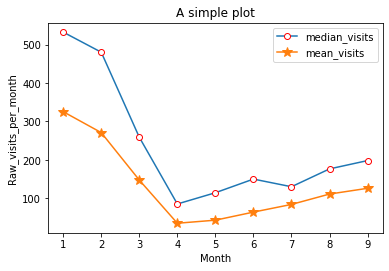

In [7]:
# get the relationship between visits and covid-19 (through time periods)
df_01 = pd.read_csv('filter_01.csv')
df_02 = pd.read_csv('filter_02.csv')
df_03 = pd.read_csv('filter_03.csv')
df_04 = pd.read_csv('filter_04.csv')
df_05 = pd.read_csv('filter_05.csv')
df_06 = pd.read_csv('filter_06.csv')
df_07 = pd.read_csv('filter_07.csv')
df_08 = pd.read_csv('filter_08.csv')
df_09 = pd.read_csv('filter_09.csv')

temp_list = [df_01,df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09]

mean01 = df_01["raw_visit_counts"].mean()
median01 = df_01["raw_visit_counts"].median()

median_list = []
mean_list = []

for i in range(len(temp_list)):
    median_list.append(temp_list[i]["raw_visit_counts"].mean())
    mean_list.append(temp_list[i]["raw_visit_counts"].median())

    
x = [1,2,3,4,5,6,7,8,9]
y1, y2 = median_list, mean_list

plt.plot(x, y1, marker='o', mec='r', mfc='w',label=u'median_visits')
plt.plot(x, y2, marker='*', ms=10,label=u'mean_visits')
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"Month")
plt.ylabel("Raw_visits_per_month") 
plt.title("A simple plot")
plt.show()


In [8]:
list_visits  = df_01["raw_visit_counts"].values
# set activity level by visits per month
print(np.count_nonzero(list_visits < 100))
print(np.count_nonzero((list_visits < 500) & (list_visits > 100)))
print(np.count_nonzero((list_visits < 1000) & (list_visits > 500)))
print(np.count_nonzero((list_visits < 5000) & (list_visits > 1000)))
print(np.count_nonzero(list_visits >5000))

# group restaurants by visits permonth
visit_lowest = list_visits[np.where(list_visits < 100)]
visit_lowe = list_visits[np.where((list_visits < 500) & (list_visits > 100))]
visit_middle = list_visits[np.where((list_visits < 1000) & (list_visits > 500))]
visit_high = list_visits[np.where((list_visits < 5000) & (list_visits > 1000))]
visit_highest = list_visits[np.where(list_visits >5000)]

83
317
119
48
7


In [9]:
df_01

,name,street_address_x,city,region,postal_code,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,...,CITY,State,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,Ilona,783 Tremont St,Boston,MA,2118,NaN,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,506,282,...,Roxbury,MA,Active,FS,Eating & Drinking,2018-11-08 11:32:12,16173910502,422083.0,0.000000,0.000000
1,Juice Press,225 Franklin St,Boston,MA,2110,Juice Press,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,249,93,...,Boston,MA,Active,FT,Eating & Drinking w/ Take Out,2017-02-08 15:40:12,16462854078,158047.0,42.356135,-71.054068
2,Boloco,283 Longwood Ave,Boston,MA,2115,Boloco,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,499,254,...,BOSTON,MA,Active,FT,Eating & Drinking w/ Take Out,2006-12-07 13:36:32,16172662200,NaN,0.000000,0.000000
3,Starbucks,360 Huntington Ave,Boston,MA,2115,Starbucks,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,110,54,...,BOSTON,MA,Active,FT,Eating & Drinking w/ Take Out,2008-03-13 13:14:02,16173532947,NaN,0.000000,0.000000
4,Starbucks,300 Longwood Ave,Boston,MA,2115,Starbucks,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,3478,1559,...,BOSTON,MA,Active,FT,Eating & Drinking w/ Take Out,2008-03-13 13:14:02,16173532947,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Bar Lyon,1750 Washington St Fl 1,Boston,MA,2118,NaN,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,544,363,...,Boston,MA,Active,FS,Eating & Drinking,2017-09-28 14:21:38,16177332393,370552.0,0.000000,0.000000
570,Pho Common,468 Commonwealth Ave,Boston,MA,2215,NaN,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,125,87,...,Boston,MA,Active,FS,Eating & Drinking,2016-12-23 07:48:06,16173288831,40980.0,42.348550,-71.093480
571,City Tap House,10 Boston Wharf Rd,Boston,MA,2210,NaN,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,492,387,...,Boston,MA,Active,FS,Eating & Drinking,2016-01-25 10:47:58,14843518711,42114.0,42.349930,-71.047410
572,Eagle Hill Cafe,1 Marion St,Boston,MA,2128,NaN,2020-01-01T00:00:00-05:00,2020-02-01T00:00:00-05:00,803,286,...,East Boston,MA,Active,FT,Eating & Drinking w/ Take Out,2020-01-21 15:14:13,18572044619,420809.0,0.000000,0.000000


[Text(0, 0, 'Boston'),
 Text(0, 0, 'Roxbury'),
 Text(0, 0, 'Dorchester'),
 Text(0, 0, 'SouthBoston'),
 Text(0, 0, 'EastBoston'),
 Text(0, 0, 'Allston'),
 Text(0, 0, 'MissionHill'),
 Text(0, 0, 'Brighton'),
 Text(0, 0, 'JamaicaPlain'),
 Text(0, 0, 'Charlestown'),
 Text(0, 0, 'Mattapan'),
 Text(0, 0, 'Roslindale'),
 Text(0, 0, 'HydePark'),
 Text(0, 0, 'SouthEnd')]

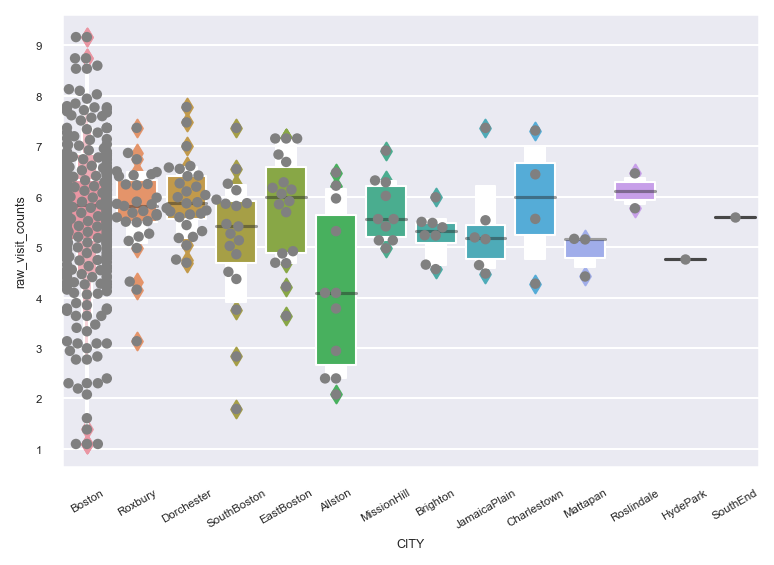

In [32]:
# get the relationship between visits and different areas (by CITY of restaurant)

# group restaurants by post code
df_01.loc[:,'CITY'].value_counts()

CITY_Boston_01 = df_01.loc[df_01['CITY'] == 'Boston'] #df_01.loc[df_01['CITY'] == 'BOSTON']
CITY_Roxbury_01 = df_01.loc[df_01['CITY'] == 'Roxbury'] #+ df_01.loc[df_01['CITY'] == 'West Roxbury']
CITY_Dorchester_01 = df_01.loc[df_01['CITY'] == 'Dorchester'] #+ df_01.loc[df_01['CITY'] == 'DORCHESTER']
CITY_SouthBoston_01 = df_01.loc[df_01['CITY'] == 'South Boston'] #+ df_01.loc[df_01['CITY'] == 'SOUTH BOSTON']
CITY_EastBoston_01 = df_01.loc[df_01['CITY'] == 'East Boston'] #+ df_01.loc[df_01['CITY'] == 'East  Boston'] + df_01.loc[df_01['CITY'] == 'EAST BOSTON']
CITY_Allston_01 = df_01.loc[df_01['CITY'] == 'Allston']
CITY_MissionHill_01 = df_01.loc[df_01['CITY'] == 'Mission Hill'] #+ df_01.loc[df_01['CITY'] == 'Mission Hill/']
CITY_Brighton_01 = df_01.loc[df_01['CITY'] == 'Brighton']
CITY_JamaicaPlain_01 = df_01.loc[df_01['CITY'] == 'Jamaica Plain']
CITY_Charlestown_01 = df_01.loc[df_01['CITY'] == 'Charlestown']
CITY_Mattapan_01 = df_01.loc[df_01['CITY'] == 'Mattapan'] #+ df_01.loc[df_01['CITY'] == 'MATTAPAN'] 
CITY_Roslindale_01 = df_01.loc[df_01['CITY'] == 'Roslindale']
CITY_HydePark_01 = df_01.loc[df_01['CITY'] == 'Hyde Park']
CITY_SouthEnd_01 = df_01.loc[df_01['CITY'] == 'South End']

# CITY_visit
CITY_visit_01 = CITY_Boston_01.append([CITY_Roxbury_01, CITY_Dorchester_01, CITY_SouthBoston_01, CITY_EastBoston_01, CITY_Allston_01, CITY_MissionHill_01, CITY_Brighton_01,
                                 CITY_JamaicaPlain_01, CITY_Charlestown_01, CITY_Mattapan_01, CITY_Roslindale_01, CITY_HydePark_01, CITY_SouthEnd_01],ignore_index = 'True')
CITY_visit_01["raw_visit_counts"] = CITY_visit_01["raw_visit_counts"].apply(np.log1p)
city = ['Boston','Roxbury','Dorchester','SouthBoston','EastBoston','Allston','MissionHill','Brighton','JamaicaPlain','Charlestown','Mattapan','Roslindale',
    'HydePark', 'SouthEnd']
plt.figure(dpi=150)
g = sns.boxenplot(x='CITY',y='raw_visit_counts',data=CITY_visit_01,k_depth='tukey')
f = sns.swarmplot(x='CITY',y='raw_visit_counts',data=CITY_visit_01,color=".5")
g.set_xticklabels(city, rotation=30)

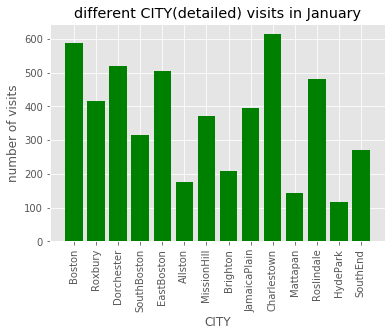

In [11]:
nums_city_01 = []
nums_city_01.append(CITY_Boston_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Roxbury_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Dorchester_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_SouthBoston_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_EastBoston_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Allston_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_MissionHill_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Brighton_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_JamaicaPlain_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Charlestown_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Mattapan_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_Roslindale_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_HydePark_01['raw_visit_counts'].mean())
nums_city_01.append(CITY_SouthEnd_01['raw_visit_counts'].mean())

plt.style.use('ggplot')
city = ['Boston','Roxbury','Dorchester','SouthBoston','EastBoston','Allston','MissionHill','Brighton','JamaicaPlain','Charlestown','Mattapan','Roslindale',
    'HydePark', 'SouthEnd']
x_pos = [i for i, _ in enumerate(city)]
plt.bar(x_pos, nums_city_01, color='green')
plt.xlabel("CITY")
plt.ylabel("number of visits")
plt.title("different CITY(detailed) visits in January")
plt.xticks(x_pos,city,rotation='vertical')
plt.show()

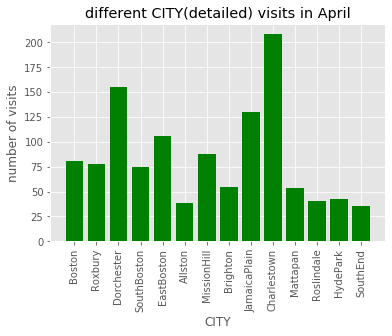

In [12]:
# number of visits to different CITY in April
df_04.loc[:,'CITY'].value_counts()
CITY_Boston = df_04.loc[df_04['CITY'] == 'Boston'] #df_01.loc[df_01['CITY'] == 'BOSTON']
CITY_Roxbury = df_04.loc[df_04['CITY'] == 'Roxbury'] #+ df_01.loc[df_01['CITY'] == 'West Roxbury']
CITY_Dorchester = df_04.loc[df_04['CITY'] == 'Dorchester'] #+ df_01.loc[df_01['CITY'] == 'DORCHESTER']
CITY_SouthBoston = df_04.loc[df_04['CITY'] == 'South Boston'] #+ df_01.loc[df_01['CITY'] == 'SOUTH BOSTON']
CITY_EastBoston = df_04.loc[df_04['CITY'] == 'East Boston'] #+ df_01.loc[df_01['CITY'] == 'East  Boston'] + df_01.loc[df_01['CITY'] == 'EAST BOSTON']
CITY_Allston = df_04.loc[df_04['CITY'] == 'Allston']
CITY_MissionHill = df_04.loc[df_04['CITY'] == 'Mission Hill'] #+ df_01.loc[df_01['CITY'] == 'Mission Hill/']
CITY_Brighton = df_04.loc[df_04['CITY'] == 'Brighton']
CITY_JamaicaPlain = df_04.loc[df_04['CITY'] == 'Jamaica Plain']
CITY_Charlestown = df_04.loc[df_04['CITY'] == 'Charlestown']
CITY_Mattapan = df_04.loc[df_04['CITY'] == 'Mattapan'] #+ df_01.loc[df_01['CITY'] == 'MATTAPAN'] 
CITY_Roslindale = df_04.loc[df_04['CITY'] == 'Roslindale']
CITY_HydePark = df_04.loc[df_04['CITY'] == 'Hyde Park']
CITY_SouthEnd = df_04.loc[df_04['CITY'] == 'South End']

nums_04 = []
nums_04.append(CITY_Boston['raw_visit_counts'].mean())
nums_04.append(CITY_Roxbury['raw_visit_counts'].mean())
nums_04.append(CITY_Dorchester['raw_visit_counts'].mean())
nums_04.append(CITY_SouthBoston['raw_visit_counts'].mean())
nums_04.append(CITY_EastBoston['raw_visit_counts'].mean())
nums_04.append(CITY_Allston['raw_visit_counts'].mean())
nums_04.append(CITY_MissionHill['raw_visit_counts'].mean())
nums_04.append(CITY_Brighton['raw_visit_counts'].mean())
nums_04.append(CITY_JamaicaPlain['raw_visit_counts'].mean())
nums_04.append(CITY_Charlestown['raw_visit_counts'].mean())
nums_04.append(CITY_Mattapan['raw_visit_counts'].mean())
nums_04.append(CITY_Roslindale['raw_visit_counts'].mean())
nums_04.append(CITY_HydePark['raw_visit_counts'].mean())
nums_04.append(CITY_SouthEnd['raw_visit_counts'].mean())

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(city)]
plt.bar(x_pos, nums_04, color='green')
plt.xlabel("CITY")
plt.ylabel("number of visits")
plt.title("different CITY(detailed) visits in April")
plt.xticks(x_pos,city,rotation='vertical')
plt.show()

Text(0.5, 1.0, 'change of numbers of visits to Allston')

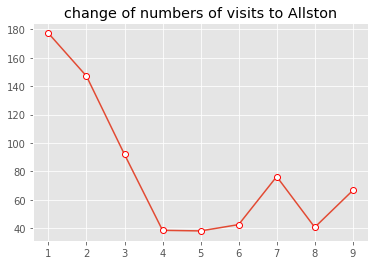

In [13]:
# change of numbers of visits to Allston
num_Allston = []
CITY_Allston_01 = df_01.loc[df_01['CITY'] == 'Allston']
CITY_Allston_02 = df_02.loc[df_02['CITY'] == 'Allston']
CITY_Allston_03 = df_03.loc[df_03['CITY'] == 'Allston']
CITY_Allston_04 = df_04.loc[df_04['CITY'] == 'Allston']
CITY_Allston_05 = df_05.loc[df_05['CITY'] == 'Allston']
CITY_Allston_06 = df_06.loc[df_06['CITY'] == 'Allston']
CITY_Allston_07 = df_07.loc[df_07['CITY'] == 'Allston']
CITY_Allston_08 = df_08.loc[df_08['CITY'] == 'Allston']
CITY_Allston_09 = df_09.loc[df_09['CITY'] == 'Allston']

num_Allston.append(CITY_Allston_01['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_02['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_03['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_04['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_05['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_06['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_07['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_08['raw_visit_counts'].mean())
num_Allston.append(CITY_Allston_09['raw_visit_counts'].mean())

month = ['1','2','3','4','5','6','7','8','9']
plt.plot(month, num_Allston, marker='o', mec='r', mfc='w',label=u'mean_visits')
plt.title('change of numbers of visits to Allston')

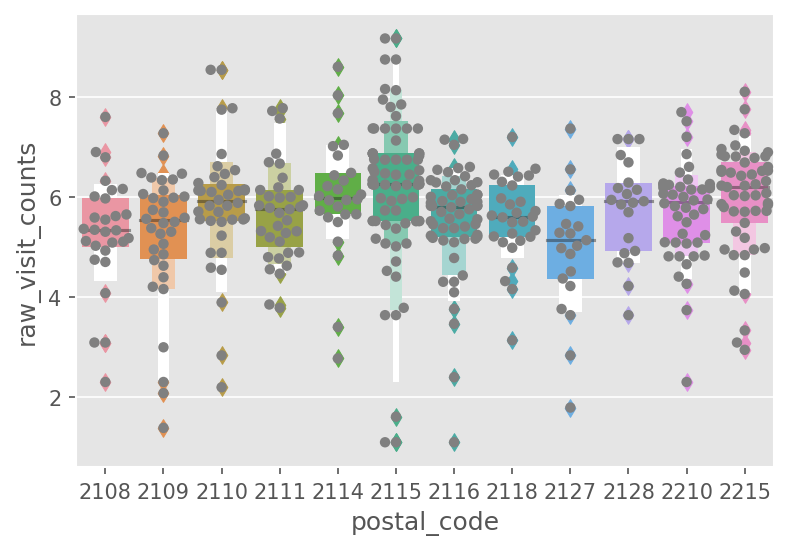

In [14]:
# get the relationship between visits and different areas (by postal_code of restaurant)

# group restaurants by post code
df_01.loc[:,'postal_code'].value_counts()


post_2115_01 = df_01.loc[df_01['postal_code'] == 2115]
post_2116_01 = df_01.loc[df_01['postal_code'] == 2116]
post_2215_01 = df_01.loc[df_01['postal_code'] == 2215]
post_2210_01 = df_01.loc[df_01['postal_code'] == 2210]
post_2110_01 = df_01.loc[df_01['postal_code'] == 2110]
post_2111_01 = df_01.loc[df_01['postal_code'] == 2111]
post_2109_01 = df_01.loc[df_01['postal_code'] == 2109]
post_2118_01 = df_01.loc[df_01['postal_code'] == 2118]
post_2108_01 = df_01.loc[df_01['postal_code'] == 2108]
post_2114_01 = df_01.loc[df_01['postal_code'] == 2114]
post_2128_01 = df_01.loc[df_01['postal_code'] == 2128]
post_2127_01 = df_01.loc[df_01['postal_code'] == 2127]


# postcode_visit = pd.DataFrame(columns=['postal_code', 'raw_visits'])
postcode_visit = post_2115_01.append([post_2116_01,post_2215_01,post_2210_01,post_2110_01,post_2111_01,post_2109_01,post_2118_01,post_2108_01,post_2114_01,post_2128_01,post_2127_01],ignore_index = 'True')
postcode_visit["raw_visit_counts"] = postcode_visit["raw_visit_counts"].apply(np.log1p)

#common01["raw_visit_counts"] = common01["raw_visit_counts"].apply(np.log1p)

plt.figure(dpi=150)
sns.boxenplot(x='postal_code',y='raw_visit_counts',data=postcode_visit,k_depth='tukey')
sns.swarmplot(x='postal_code',y='raw_visit_counts',data=postcode_visit,color=".5")


In [15]:
# number of visits to different post_code in January
nums_01 = []
nums_01.append(post_2108_01['raw_visit_counts'].mean())
nums_01.append(post_2109_01['raw_visit_counts'].mean())
nums_01.append(post_2110_01['raw_visit_counts'].mean())
nums_01.append(post_2111_01['raw_visit_counts'].mean())
nums_01.append(post_2114_01['raw_visit_counts'].mean())
nums_01.append(post_2115_01['raw_visit_counts'].mean())
nums_01.append(post_2116_01['raw_visit_counts'].mean())
nums_01.append(post_2118_01['raw_visit_counts'].mean())
nums_01.append(post_2127_01['raw_visit_counts'].mean())
nums_01.append(post_2128_01['raw_visit_counts'].mean())
nums_01.append(post_2210_01['raw_visit_counts'].mean())
nums_01.append(post_2215_01['raw_visit_counts'].mean())

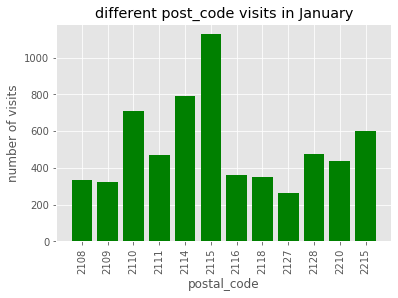

In [16]:
plt.style.use('ggplot')
x = ['2108','2109','2110','2111','2114','2115','2116','2118','2127','2128','2210','2215']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, nums_01, color='green')
plt.xlabel("postal_code")
plt.ylabel("number of visits")
plt.title("different post_code visits in January")
plt.xticks(x_pos, x, rotation = 'vertical')
plt.savefig('post_01.png', dpi=300)
plt.show()

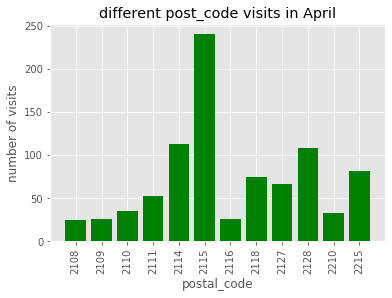

In [17]:
# number of visits to different post_code in April
df_04.loc[:,'postal_code'].value_counts()
post_2115_04 = df_04.loc[df_04['postal_code'] == 2115]
post_2116_04 = df_04.loc[df_04['postal_code'] == 2116]
post_2215_04 = df_04.loc[df_04['postal_code'] == 2215]
post_2210_04 = df_04.loc[df_04['postal_code'] == 2210]
post_2110_04 = df_04.loc[df_04['postal_code'] == 2110]
post_2111_04 = df_04.loc[df_04['postal_code'] == 2111]
post_2109_04 = df_04.loc[df_04['postal_code'] == 2109]
post_2118_04 = df_04.loc[df_04['postal_code'] == 2118]
post_2108_04 = df_04.loc[df_04['postal_code'] == 2108]
post_2114_04 = df_04.loc[df_04['postal_code'] == 2114]
post_2128_04 = df_04.loc[df_04['postal_code'] == 2128]
post_2127_04 = df_04.loc[df_04['postal_code'] == 2127]
nums_04 = []
nums_04.append(post_2108_04['raw_visit_counts'].mean())
nums_04.append(post_2109_04['raw_visit_counts'].mean())
nums_04.append(post_2110_04['raw_visit_counts'].mean())
nums_04.append(post_2111_04['raw_visit_counts'].mean())
nums_04.append(post_2114_04['raw_visit_counts'].mean())
nums_04.append(post_2115_04['raw_visit_counts'].mean())
nums_04.append(post_2116_04['raw_visit_counts'].mean())
nums_04.append(post_2118_04['raw_visit_counts'].mean())
nums_04.append(post_2127_04['raw_visit_counts'].mean())
nums_04.append(post_2128_04['raw_visit_counts'].mean())
nums_04.append(post_2210_04['raw_visit_counts'].mean())
nums_04.append(post_2215_04['raw_visit_counts'].mean())
plt.style.use('ggplot')
plt.bar(x_pos, nums_04, color='green')
plt.xlabel("postal_code")
plt.ylabel("number of visits")
plt.title("different post_code visits in April")
plt.xticks(x_pos, x, rotation = 'vertical')
plt.savefig('post_04.png', dpi=300)
plt.show()

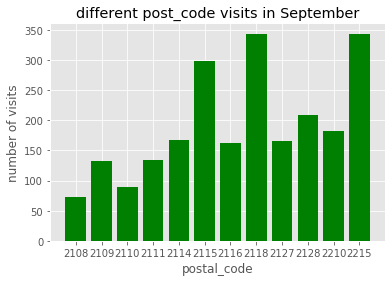

In [18]:
# different post_code visits in September
df_09.loc[:,'postal_code'].value_counts()
post_2115_09 = df_09.loc[df_09['postal_code'] == 2115]
post_2116_09 = df_09.loc[df_09['postal_code'] == 2116]
post_2215_09 = df_09.loc[df_09['postal_code'] == 2215]
post_2210_09 = df_09.loc[df_09['postal_code'] == 2210]
post_2110_09 = df_09.loc[df_09['postal_code'] == 2110]
post_2111_09 = df_09.loc[df_09['postal_code'] == 2111]
post_2109_09 = df_09.loc[df_09['postal_code'] == 2109]
post_2118_09 = df_09.loc[df_09['postal_code'] == 2118]
post_2108_09 = df_09.loc[df_09['postal_code'] == 2108]
post_2114_09 = df_09.loc[df_09['postal_code'] == 2114]
post_2128_09 = df_09.loc[df_09['postal_code'] == 2128]
post_2127_09 = df_09.loc[df_09['postal_code'] == 2127]
nums_09 = []
nums_09.append(post_2108_09['raw_visit_counts'].mean())
nums_09.append(post_2109_09['raw_visit_counts'].mean())
nums_09.append(post_2110_09['raw_visit_counts'].mean())
nums_09.append(post_2111_09['raw_visit_counts'].mean())
nums_09.append(post_2114_09['raw_visit_counts'].mean())
nums_09.append(post_2115_09['raw_visit_counts'].mean())
nums_09.append(post_2116_09['raw_visit_counts'].mean())
nums_09.append(post_2118_09['raw_visit_counts'].mean())
nums_09.append(post_2127_09['raw_visit_counts'].mean())
nums_09.append(post_2128_09['raw_visit_counts'].mean())
nums_09.append(post_2210_09['raw_visit_counts'].mean())
nums_09.append(post_2215_09['raw_visit_counts'].mean())
plt.style.use('ggplot')
plt.bar(x_pos, nums_09, color='green')
plt.xlabel("postal_code")
plt.ylabel("number of visits")
plt.title("different post_code visits in September")
plt.xticks(x_pos, x)
plt.savefig('post_09.png', dpi=300)
plt.show()

In [19]:
# change of numbers of visits to 02116
num_2116 = []
post_2116_02 = df_02.loc[df_02['postal_code'] == 2116]
post_2116_03 = df_03.loc[df_03['postal_code'] == 2116]
post_2116_05 = df_05.loc[df_05['postal_code'] == 2116]
post_2116_06 = df_06.loc[df_06['postal_code'] == 2116]
post_2116_07 = df_07.loc[df_07['postal_code'] == 2116]
post_2116_08 = df_08.loc[df_08['postal_code'] == 2116]
post_2116_09 = df_09.loc[df_09['postal_code'] == 2116]


In [20]:
num_2116.append(post_2116_01['raw_visit_counts'].mean())
num_2116.append(post_2116_02['raw_visit_counts'].mean())
num_2116.append(post_2116_03['raw_visit_counts'].mean())
num_2116.append(post_2116_04['raw_visit_counts'].mean())
num_2116.append(post_2116_05['raw_visit_counts'].mean())
num_2116.append(post_2116_06['raw_visit_counts'].mean())
num_2116.append(post_2116_07['raw_visit_counts'].mean())
num_2116.append(post_2116_08['raw_visit_counts'].mean())
num_2116.append(post_2116_09['raw_visit_counts'].mean())


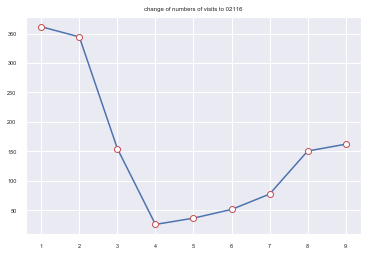

In [29]:
month = ['1','2','3','4','5','6','7','8','9']
plt.plot(month, num_2116, marker='o', mec='r', mfc='w',label=u'mean_visits')
plt.title('change of numbers of visits to 02116')
plt.savefig('post_02116.png', dpi=300)

In [22]:
# change of numbers of visits to 02118
num_2118 = []
post_2118_02 = df_02.loc[df_02['postal_code'] == 2118]
post_2118_03 = df_03.loc[df_03['postal_code'] == 2118]
post_2118_05 = df_05.loc[df_05['postal_code'] == 2118]
post_2118_06 = df_06.loc[df_06['postal_code'] == 2118]
post_2118_07 = df_07.loc[df_07['postal_code'] == 2118]
post_2118_08 = df_08.loc[df_08['postal_code'] == 2118]
post_2118_09 = df_09.loc[df_09['postal_code'] == 2118]


In [23]:
num_2118.append(post_2118_01['raw_visit_counts'].mean())
num_2118.append(post_2118_02['raw_visit_counts'].mean())
num_2118.append(post_2118_03['raw_visit_counts'].mean())
num_2118.append(post_2118_04['raw_visit_counts'].mean())
num_2118.append(post_2118_05['raw_visit_counts'].mean())
num_2118.append(post_2118_06['raw_visit_counts'].mean())
num_2118.append(post_2118_07['raw_visit_counts'].mean())
num_2118.append(post_2118_08['raw_visit_counts'].mean())
num_2118.append(post_2118_09['raw_visit_counts'].mean())


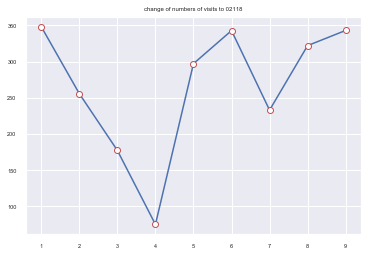

In [28]:
plt.plot(month, num_2118, marker='o', mec='r', mfc='w',label=u'mean_visits')
plt.title('change of numbers of visits to 02118')
plt.savefig('post_02118.png', dpi=300)

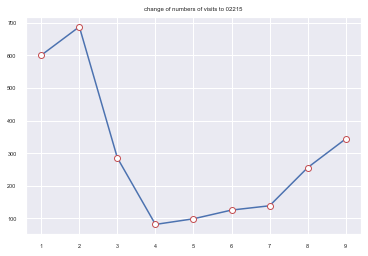

In [27]:
# change of numbers of visits to 02118
num_2215 = []
post_2215_02 = df_02.loc[df_02['postal_code'] == 2215]
post_2215_03 = df_03.loc[df_03['postal_code'] == 2215]
post_2215_05 = df_05.loc[df_05['postal_code'] == 2215]
post_2215_06 = df_06.loc[df_06['postal_code'] == 2215]
post_2215_07 = df_07.loc[df_07['postal_code'] == 2215]
post_2215_08 = df_08.loc[df_08['postal_code'] == 2215]
post_2215_09 = df_09.loc[df_09['postal_code'] == 2215]
num_2215.append(post_2215_01['raw_visit_counts'].mean())
num_2215.append(post_2215_02['raw_visit_counts'].mean())
num_2215.append(post_2215_03['raw_visit_counts'].mean())
num_2215.append(post_2215_04['raw_visit_counts'].mean())
num_2215.append(post_2215_05['raw_visit_counts'].mean())
num_2215.append(post_2215_06['raw_visit_counts'].mean())
num_2215.append(post_2215_07['raw_visit_counts'].mean())
num_2215.append(post_2215_08['raw_visit_counts'].mean())
num_2215.append(post_2215_09['raw_visit_counts'].mean())
plt.plot(month, num_2215, marker='o', mec='r', mfc='w',label=u'mean_visits')
plt.title('change of numbers of visits to 02215')
plt.savefig('post_02215.png', dpi=300)

[Text(0, 0, 'Subway'),
 Text(0, 0, 'Starbucks'),
 Text(0, 0, 'Pret A Manger'),
 Text(0, 0, 'Juice Press'),
 Text(0, 0, 'Chipotle Mexican Grill'),
 Text(0, 0, "Ben & Jerry's"),
 Text(0, 0, "McDonald's"),
 Text(0, 0, 'Blaze Pizza')]

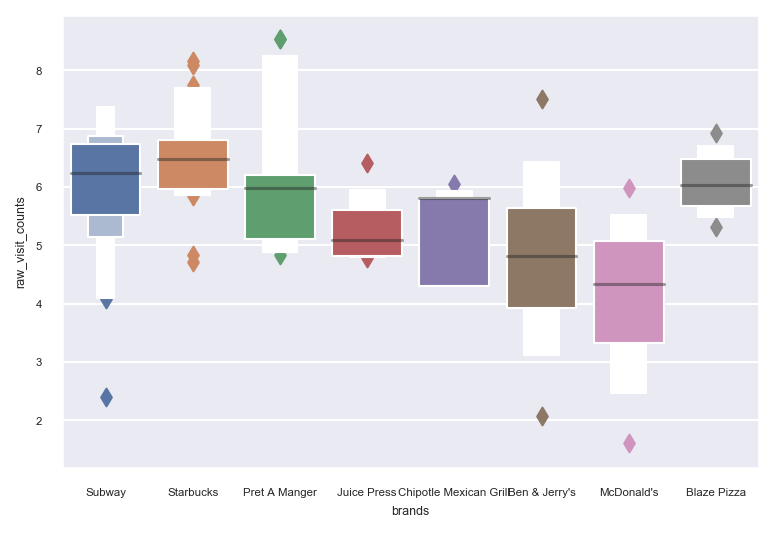

In [41]:
# get the relationship between visits and brands of restaurants

df_01.loc[:,'brands'].value_counts()

brand_01 = df_01.loc[df_01['brands'] == "Subway"]
brand_02 = df_01.loc[df_01['brands'] == "Starbucks"]
brand_03 = df_01.loc[df_01['brands'] == "Pret A Manger"]
brand_04 = df_01.loc[df_01['brands'] == "Juice Press"]
brand_05 = df_01.loc[df_01['brands'] == "Chipotle Mexican Grill"]
brand_06 = df_01.loc[df_01['brands'] == "Ben & Jerry's"]
brand_07 = df_01.loc[df_01['brands'] == "McDonald's"]
brand_08 = df_01.loc[df_01['brands'] == "Blaze Pizza"]
brand_09 = df_01.loc[df_01['brands'] == "Boloco"]
brand_10 = df_01.loc[df_01['brands'] == "Au Bon Pain"]
brand_11 = df_01.loc[df_01['brands'] == "Burger King"]
brand_12 = df_01.loc[df_01['brands'] == "Blue Bottle Coffee"]
brand_13 = df_01.loc[df_01['brands'] == "Five Guys"]
brand_14 = df_01.loc[df_01['brands'] == "Shake Shack"]
#brand_NaN = common01[pd.isna(common01['brands'])==True]

brands = ["Subway","Starbucks", "Pret A Manger", "Juice Press","Chipotle Mexican Grill", "Ben & Jerry's", "McDonald's", 
          "Blaze Pizza", "Boloco", "Au Bon Pain", "Burger King", "Blue Bottle Coffee","Five Guys", "Shake Shack" ]
postcode_visit = brand_01.append([brand_02,brand_03,brand_04,brand_05,brand_06,brand_07,brand_08],ignore_index = 'True')

postcode_visit["raw_visit_counts"] = postcode_visit["raw_visit_counts"].apply(np.log1p)
#brand_NaN["raw_visit_counts"] = brand_NaN["raw_visit_counts"].apply(np.log1p)
#common01["raw_visit_counts"] = common01["raw_visit_counts"].apply(np.log1p)

plt.figure(dpi=150)

b=sns.boxenplot(x='brands',y='raw_visit_counts',data=postcode_visit,k_depth='tukey')
sns.set(font_scale=0.5)
b.set_xticklabels(brands)
# sns.boxenplot(x='region',y='raw_visit_counts',data=brand_NaN,k_depth='tukey')